### Load packages and data files from previous notebook

In [862]:
## Imports
from scipy import io
import pandas as pd
import numpy as np
import os
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
%matplotlib inline 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [863]:
## Load CSV files
file_path = r'C:\Users\natha\Desktop\bootcamp_repo-1\NW_Atlantic_Fishery_Sustainability\data\interim'
fish_young, fish_adult, fish_all = [fr'{file_path}\fish_young.csv', \
    fr'{file_path}\fish_adult.csv', fr'{file_path}\fish_data.csv', ]

all_df = pd.read_csv(fish_all).drop(['Unnamed: 0'], axis=1)
young_df = pd.read_csv(fish_young).drop(['Unnamed: 0'], axis=1)
adult_df = pd.read_csv(fish_adult).drop(['Unnamed: 0'], axis=1)

In [864]:
print(young_df.isna().sum())
print(adult_df.isna().sum())

ecosystem            0
species              0
year                 0
biomass            294
abundance          294
biomass_index      296
abundance_index      7
avg_len             73
avg_mass           296
source               0
agency               0
season               0
species_lower        0
dtype: int64
ecosystem             0
species               0
year                  0
biomass            1375
abundance          2016
biomass_index      2092
abundance_index    1930
avg_len            2887
avg_mass           2730
source                0
agency                0
season                0
species_lower         0
dtype: int64


In [865]:
young_df.dropna(subset=['abundance_index'], inplace=True)
adult_df.dropna(subset=['abundance_index'], inplace=True)

print(len(set(young_df['species_lower'].values)), young_df.shape)
print(len(set(adult_df['species_lower'].values)), adult_df.shape)
print(list(set(young_df['ecosystem'].values)))
print(list(set(adult_df['ecosystem'].values)))

19 (325, 13)
15 (1546, 13)
['LIS', 'CB', 'CTS']
['NJ', 'NB', 'HR', 'LIS', 'CB', 'CTS']


In [866]:
adult_df.drop(columns=['species','biomass','abundance','biomass_index','avg_len','avg_mass'],inplace=True)
young_df.drop(columns=['species','biomass','abundance','biomass_index','avg_len','avg_mass'],inplace=True)
print(adult_df.isna().sum())

ecosystem          0
year               0
abundance_index    0
source             0
agency             0
season             0
species_lower      0
dtype: int64


In [867]:
adult_df.groupby(by='species_lower').describe()

year                                                  \
                     count         mean       std     min      25%     50%   
species_lower                                                                
american_eel          56.0  1995.089286  8.160385  1980.0  1989.00  1994.5   
american_sand_lance   73.0  1999.958904  6.711181  1988.0  1994.00  2001.0   
atlantic_herring     150.0  1996.813333  7.702860  1980.0  1991.00  1997.0   
bay_anchovy           94.0  1998.468085  7.635095  1980.0  1993.00  1999.0   
black_sea_bass       110.0  1998.418182  7.105214  1984.0  1993.00  1999.0   
blue_crab            116.0  1998.844828  7.134245  1980.0  1994.00  1999.5   
conger_eel            58.0  1998.637931  6.262386  1988.0  1993.25  1998.0   
silver_perch          57.0  1998.368421  7.145507  1982.0  1993.00  1998.0   
spot                  95.0  1998.452632  7.566399  1982.0  1992.00  1999.0   
striped_bass         134.0  1998.447761  7.405106  1980.0  1993.00  1999.0   
summer_flounder      179.0  1996.586592  8.223496  1980.0  1990.00  1997.0   
weakfish             123.0  1998.609756  7.721202  1980.0  1992.50  2000.0   
white_catfish         27.0  1993.333333  8.430713  1980.0  1986.50  1993.0   
white_perch           67.0  1997.253731  7.818671  1980.0  1992.00  1997.0   
winter_flounder      207.0  1996.169082  7.816178  1980.0  1990.00  1996.0   

                                     abundance_index               \
                         75%     max           count         mean   
species_lower                                                       
american_eel         2002.25  2009.0            56.0     0.263487   
american_sand_lance  2006.00  2010.0            73.0    32.149089   
atlantic_herring     2003.00  2010.0           150.0    69.030073   
bay_anchovy          2005.00  2010.0            94.0   716.142619   
black_sea_bass       2004.75  2010.0           110.0     3.251248   
blue_crab            2005.00  2010.0           116.0     3.358635   
conger_eel           2003.00  2010.0            58.0     2.379678   
silver_perch         2004.00  2010.0            57.0     2.967959   
spot                 2005.00  2010.0            95.0   365.693975   
striped_bass         2004.00  2010.0           134.0    43.231973   
summer_flounder      2004.00  2010.0           179.0    20.812589   
weakfish             2005.00  2010.0           123.0   146.621131   
white_catfish        1999.50  2008.0            27.0     0.021490   
white_perch          2004.00  2009.0            67.0  1837.500119   
winter_flounder      2002.50  2010.0           207.0    17.135625   

                                                                            \
                             std       min       25%       50%         75%   
species_lower                                                                
american_eel            1.115324  0.012500  0.025905  0.038844    0.064184   
american_sand_lance    64.929283  0.005102  0.466667  3.152152   21.366667   
atlantic_herring      157.249830  0.000000  0.457397  3.585417   31.349998   
bay_anchovy          1566.734000  0.008333  0.624706  6.287620  347.089001   
black_sea_bass          8.888696  0.000719  0.025000  0.327083    2.286458   
blue_crab              10.757176  0.006809  0.070996  0.275223    1.113305   
conger_eel             11.251674  0.008333  0.028817  0.045236    0.110230   
silver_perch            7.512730  0.000503  0.012658  0.067167    1.621392   
spot                 1225.515405  0.000737  0.026154  0.267241    5.703208   
striped_bass          157.182628  0.005714  0.222276  2.547548    6.086985   
summer_flounder        71.550398  0.000851  0.072222  0.666667    5.204295   
weakfish              388.414975  0.000537  0.142917  9.775000  134.072609   
white_catfish           0.052966  0.000694  0.003994  0.006931    0.014031   
white_perch          6435.024801  0.011250  0.335333  3.186620   11.430439   
winter_flounder        34.020911  0.003135  0.22

In [868]:
young_df.groupby(by='species_lower').describe()

year                                          \
                         count         mean       std     min      25%   
species_lower                                                            
american_eel_yoy/larvae    1.0  2007.000000       NaN  2007.0  2007.00   
american_sand_lance_yoy    9.0  2001.888889  5.754226  1994.0  1998.00   
anchovy_spp_yoy-est       13.0  2003.230769  5.117842  1990.0  2001.00   
atlantic_herring_yoy-est   7.0  2004.000000  2.160247  2001.0  2002.50   
bay_anchovy_yoy           23.0  1999.000000  6.782330  1988.0  1993.50   
black_sea_bass_yoy        22.0  1998.500000  6.493587  1988.0  1993.25   
blue_catfish_yoy          22.0  1998.500000  6.493587  1988.0  1993.25   
blue_crab_yoy             23.0  1999.000000  6.782330  1988.0  1993.50   
channel_catfish_yoy       22.0  1998.500000  6.493587  1988.0  1993.25   
conger_eel_yoy/larvae      1.0  2004.000000       NaN  2004.0  2004.00   
gadus_spp._yoy/larvae      2.0  2007.000000  2.828427  2005.0  2006.00   
silver_perch_yoy          23.0  1999.000000  6.782330  1988.0  1993.50   
spot_yoy                  23.0  1999.000000  6.782330  1988.0  1993.50   
striped_bass_yoy          22.0  1998.500000  6.493587  1988.0  1993.25   
summer_flounder_yoy       23.0  1999.000000  6.782330  1988.0  1993.50   
weakfish_yoy              23.0  1999.000000  6.782330  1988.0  1993.50   
white_catfish_yoy         22.0  1998.500000  6.493587  1988.0  1993.25   
white_perch_yoy           22.0  1998.500000  6.493587  1988.0  1993.25   
y-o-y_winter_flounder     22.0  1998.500000  6.493587  1988.0  1993.25   

                                                  abundance_index             \
                             50%      75%     max           count       mean   
species_lower                                                                  
american_eel_yoy/larvae   2007.0  2007.00  2007.0             1.0   0.016667   
american_sand_lance_yoy   2001.0  2007.00  2009.0             9.0   0.706841   
anchovy_spp_yoy-est       2004.0  2007.00  2009.0            13.0  53.178772   
atlantic_herring_yoy-est  2004.0  2005.50  2007.0             7.0  11.628587   
bay_anchovy_yoy           1999.0  2004.50  2010.0            23.0  26.952174   
black_sea_bass_yoy        1998.5  2003.75  2009.0            22.0   0.701818   
blue_catfish_yoy          1998.5  2003.75  2009.0            22.0   0.736818   
blue_crab_yoy             1999.0  2004.50  2010.0            23.0   5.527826   
channel_catfish_yoy       1998.5  2003.75  2009.0            22.0   0.141818   
conger_eel_yoy/larvae     2004.0  2004.00  2004.0             1.0   0.016667   
gadus_spp._yoy/larvae     2007.0  2008.00  2009.0             2.0   0.028403   
silver_perch_yoy          1999.0  2004.50  2010.0            23.0   0.642609   
spot_yoy                  1999.0  2004.50  2010.0            23.0  15.140000   
striped_bass_yoy          1998.5  2003.75  2009.0            22.0   0.865909   
summer_flounder_yoy       1999.0  2004.50  2010.0            23.0   1.004783   
weakfish_yoy              1999.0  2004.50  2010.0            23.0   6.812609   
white_catfish_yoy         1998.5  2003.75  2009.0            22.0   0.378636   
white_perch_yoy           1998.5  2003.75  2009.0            22.0   8.215455   
y-o-y_winter_flounder     1998.5  2003.75  2009.0            22.0  14.718073   

                                                                     \
                                std       min        25%        50%   
species_lower                                                         
american_eel_yoy/larvae         NaN  0.016667   0.016667   0.016667   
american_sand_lance_yoy    0.399515  0.112500   0.553750   0.632500   
anchovy_spp_yoy-est       33.946313  0.294118  39.712500  47.850000   
atlantic_herring_yoy-est  10.537721  0.987500   4.868179   9.015000   
bay_anchovy_yoy           17.986144  5.510000  16.750000  22.270000   
black_sea_bass_yoy         0.520409  0.060000   0.372500   0.575000 

What is an index of abundance? An index of abundance is a relative measure of the size of a population or sub-unit of the population, such as a year class. It is usually measured as number (or weight) of fish caught per standard unit of fishing effort. Summation is inappropriate to summarize this index across locations or seasons in the same year, use average instead.

In [869]:
adult_by_year = pd.DataFrame()
for species in list(set(adult_df['species_lower'])):
    for year in list(set(adult_df['year'])):
        adult_year_mean = adult_df.loc[(adult_df['species_lower'] == species) & (adult_df['year'] == year), 'abundance_index'].mean()
        adult_new_row = pd.DataFrame({'year': [year], 'species': [species], 'abundance_index_annual_mean': adult_year_mean})
        adult_by_year = pd.concat([adult_by_year, adult_new_row])

young_by_year = pd.DataFrame()
for species in list(set(young_df['species_lower'])):
    for year in list(set(young_df['year'])):
        year_mean = young_df.loc[(young_df['species_lower'] == species) & (young_df['year'] == year), 'abundance_index'].mean()
        new_row = pd.DataFrame({'year': [year], 'species': [species], 'abundance_index_annual_mean': year_mean})
        young_by_year = pd.concat([young_by_year, new_row])

adult_by_year.dropna(subset=['abundance_index_annual_mean'], inplace=True)
young_by_year.dropna(subset=['abundance_index_annual_mean'], inplace=True)

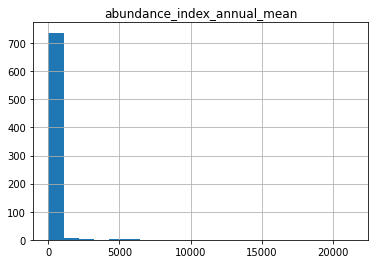

In [870]:
all_by_year = pd.concat([young_by_year, adult_by_year])
hist_abundance_index = all_by_year.hist(column='abundance_index_annual_mean', bins=20)

Log transform highly skewed abundance index.

In [871]:
log = PowerTransformer()
log.fit(all_by_year[['abundance_index_annual_mean']])
all_by_year['log_abundance_index_annual_mean'] = log.transform(all_by_year[['abundance_index_annual_mean']])
all_by_year.drop(columns=['abundance_index_annual_mean'],inplace=True)

all_by_year.shape, all_by_year.columns

((753, 3),
 Index(['year', 'species', 'log_abundance_index_annual_mean'], dtype='object'))

In [872]:
print('Missing Values')
print(all_by_year.isna().sum())

Missing Values
year                               0
species                            0
log_abundance_index_annual_mean    0
dtype: int64


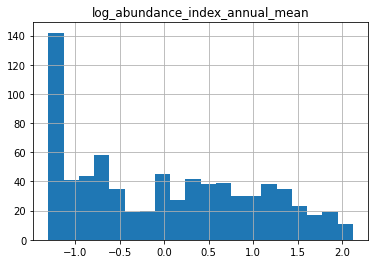

In [873]:
hist_abundance_index = all_by_year.hist(column='log_abundance_index_annual_mean', bins=20)

In [874]:
species_entries_count = pd.DataFrame(all_by_year.groupby(by='species').count())
species_entries_count['year'].value_counts()

23    8
31    7
22    7
30    2
1     2
27    2
9     1
12    1
7     1
2     1
24    1
28    1
Name: year, dtype: int64

Most species have 22 years of data or more.

In [875]:
species_w_22_entries = list(species_entries_count[species_entries_count['year']==22].index)
print(set(list(all_by_year[all_by_year['species'].isin(species_w_22_entries)]['year'])))
years_for_model = list(set(list(all_by_year[all_by_year['species'].isin(species_w_22_entries)]['year'])))

{1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009}


All species with exactly 22 years of data have the same 22 year period of data [1988-2009]. The model will include all species that have complete data over this 22 year period.

In [876]:
species_w_22_or_more = list(species_entries_count[species_entries_count['year']>=22].index)
all_by_year = all_by_year[all_by_year['species'].isin(species_w_22_or_more)]
all_by_year.shape

(721, 3)

In [877]:
all_by_year = all_by_year[all_by_year['year'].isin(years_for_model)]
all_by_year.shape

(612, 3)

In [878]:
all_by_year.groupby(by='species').describe()

year                                                  \
                      count         mean       std     min      25%     50%   
species                                                                       
american_eel           22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
american_sand_lance    22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
atlantic_herring       22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
bay_anchovy            22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
bay_anchovy_yoy        22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
black_sea_bass         22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
black_sea_bass_yoy     22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
blue_catfish_yoy       22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
blue_crab              22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
blue_crab_yoy          22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
channel_catfish_yoy    22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
conger_eel             22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
silver_perch           21.0  1998.380952  6.629300  1988.0  1993.00  1998.0   
silver_perch_yoy       22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
spot                   22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
spot_yoy               22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
striped_bass           22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
striped_bass_yoy       22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
summer_flounder        22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
summer_flounder_yoy    22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
weakfish               22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
weakfish_yoy           22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
white_catfish          19.0  1997.473684  6.266032  1988.0  1992.50  1997.0   
white_catfish_yoy      22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
white_perch            22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
white_perch_yoy        22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
winter_flounder        22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   
y-o-y_winter_flounder  22.0  1998.500000  6.493587  1988.0  1993.25  1998.5   

                                       log_abundance_index_annual_mean  \
                           75%     max                           count   
species                                                                  
american_eel           2003.75  2009.0                            22.0   
american_sand_lance    2003.75  2009.0                            22.0   
atlantic_herring       2003.75  2009.0                            22.0   
bay_anchovy            2003.75  2009.0                            22.0   
bay_anchovy_yoy        2003.75  2009.0                            22.0   
black_sea_bass         2003.75  2009.0                            22.0   
black_sea_bass_yoy     2003.75  2009.0                            22.0   
blue_catfish_yoy       2003.75  2009.0                            22.0   
blue_crab              2003.75  2009.0                            22.0   
blue_crab_yoy          2003.75  2009.0                            22.0   
channel_catfish_yoy    2003.75  2009.0                            22.0   
conger_eel             2003.75  2009.0                            22.0   
silver_perch           2004.00  2009.0                            21.0   
silver_perch_yoy       2003.75  2009.0                            22.0   
spot                   2003.75  2009.0                            22.0   
spot_yoy               2003.75  2009.0                            22.0   
striped_bass           2003.75  2009.0                            22.0   
striped_bass_yoy       2003.75  2009.0                            22.0   
summer_flounder    

silver_perch and white_catfish do not have data to cover the whole 22 year period.

In [879]:
all_by_year = all_by_year[all_by_year['species'] != 'silver_perch']
all_by_year = all_by_year[all_by_year['species'] != 'white_catfish']
all_by_year.groupby(by='species').describe()

year                                             \
                      count    mean       std     min      25%     50%   
species                                                                  
american_eel           22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
american_sand_lance    22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
atlantic_herring       22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
bay_anchovy            22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
bay_anchovy_yoy        22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
black_sea_bass         22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
black_sea_bass_yoy     22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
blue_catfish_yoy       22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
blue_crab              22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
blue_crab_yoy          22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
channel_catfish_yoy    22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
conger_eel             22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
silver_perch_yoy       22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
spot                   22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
spot_yoy               22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
striped_bass           22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
striped_bass_yoy       22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
summer_flounder        22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
summer_flounder_yoy    22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
weakfish               22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
weakfish_yoy           22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
white_catfish_yoy      22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
white_perch            22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
white_perch_yoy        22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
winter_flounder        22.0  1998.5  6.493587  1988.0  1993.25  1998.5   
y-o-y_winter_flounder  22.0  1998.5  6.493587  1988.0  1993.25  1998.5   

                                       log_abundance_index_annual_mean  \
                           75%     max                           count   
species                                                                  
american_eel           2003.75  2009.0                            22.0   
american_sand_lance    2003.75  2009.0                            22.0   
atlantic_herring       2003.75  2009.0                            22.0   
bay_anchovy            2003.75  2009.0                            22.0   
bay_anchovy_yoy        2003.75  2009.0                            22.0   
black_sea_bass         2003.75  2009.0                            22.0   
black_sea_bass_yoy     2003.75  2009.0                            22.0   
blue_catfish_yoy       2003.75  2009.0                            22.0   
blue_crab              2003.75  2009.0                            22.0   
blue_crab_yoy          2003.75  2009.0                            22.0   
channel_catfish_yoy    2003.75  2009.0                            22.0   
conger_eel             2003.75  2009.0                            22.0   
silver_perch_yoy       2003.75  2009.0                            22.0   
spot                   2003.75  2009.0                            22.0   
spot_yoy               2003.75  2009.0                            22.0   
striped_bass           2003.75  2009.0                            22.0   
striped_bass_yoy       2003.75  2009.0                            22.0   
summer_flounder        2003.75  2009.0                            22.0   
summer_flounder_yoy    2003.75  2009.0                            22.0   
weakfish               2003.75  2009.0                            22.0   
weakfish_yoy           2003.75  2009.0                            22.0   
white_catfish_yoy      2003.75  2009.0                            22.0   
white_perch            200

Data now formed as log transformed annual mean of abundance index for 26 species of fish (dividing young and adult as separate), over 22 years 1988-2009.

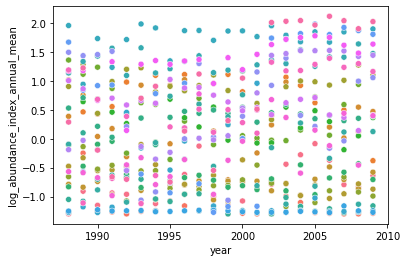

In [880]:
sns.scatterplot(x='year', y='log_abundance_index_annual_mean', data=all_by_year, hue='species').legend_.remove()

Reshape data for regression modeling, each row contains the year and all species data for that year.

In [881]:
#Adapted from: https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad
#Reshape from long to wide
log_data_df_wide=pd.pivot(all_by_year, index=['year'], columns = 'species',values = 'log_abundance_index_annual_mean') 
#Re-arange the new columns in the correct order
cols = all_by_year['species'].unique()
log_data_df_wide=log_data_df_wide[cols].reset_index()
log_data_df_wide.shape

(22, 27)

In [882]:
# Our train set will have 14 years, must reduce features (species) to 14 as well.
new_df_wide = log_data_df_wide.drop(['american_eel', 'channel_catfish_yoy', 'white_perch',\
    'summer_flounder', 'black_sea_bass_yoy', 'summer_flounder_yoy', 'spot', 'y-o-y_winter_flounder',\
    'striped_bass_yoy', 'bay_anchovy', 'black_sea_bass', 'weakfish', 'american_sand_lance'], axis=1)
# Each dropped species was removed iteratively according to high correlation with several other species.
# Adapted from: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr_mat = new_df_wide.corr().abs()
s = corr_mat.unstack()
so = s.sort_values(kind="quicksort")
print(so[170:185])
new_df_wide.shape

species            species          
blue_catfish_yoy   year                 0.512394
year               blue_catfish_yoy     0.512394
striped_bass       blue_catfish_yoy     0.542764
blue_catfish_yoy   striped_bass         0.542764
winter_flounder    striped_bass         0.608173
striped_bass       winter_flounder      0.608173
white_catfish_yoy  year                 0.617726
year               white_catfish_yoy    0.617726
winter_flounder    year                 0.693600
year               winter_flounder      0.693600
striped_bass       year                 0.905666
year               striped_bass         0.905666
                   year                 1.000000
conger_eel         conger_eel           1.000000
atlantic_herring   atlantic_herring     1.000000
dtype: float64


(22, 14)

In [883]:
new_df_wide.head()

species,year,blue_catfish_yoy,white_perch_yoy,silver_perch_yoy,bay_anchovy_yoy,spot_yoy,blue_crab_yoy,weakfish_yoy,white_catfish_yoy,blue_crab,atlantic_herring,conger_eel,striped_bass,winter_flounder
0,1988,-1.300992,0.386821,-0.787846,0.903870,1.360873,-0.109514,0.530420,-1.050583,-0.095497,1.136825,-1.274197,-0.190350,1.004755
1,1989,-0.908218,0.753052,-0.839020,1.287691,1.115575,0.641478,0.708526,0.101386,-1.081871,1.335385,-1.178934,-0.028986,0.863350
2,1990,-1.151742,0.038478,-0.739941,0.438494,1.237295,0.684348,0.214499,-0.700429,-0.885551,1.428977,-1.276344,-0.193312,0.670968
3,1991,-0.937721,0.175098,-0.968374,0.989405,0.869571,0.459360,0.024620,-1.223125,-0.629843,1.565841,-1.184462,-0.678066,0.701438
4,1992,-0.960599,-0.311141,-0.673462,1.201092,-0.249231,0.262272,0.437730,-0.673462,-1.096779,1.093815,0.455309,-0.551922,0.583368


Split data based on year into training and testing sets. Earliest 70% of data as training, lastest 30% as testing.

In [884]:
train_size = 0.7
train_num_years = np.floor(train_size*len(list(new_df_wide.index)))
train_years = list(set(all_by_year['year']))[0:int(train_num_years)-1]
train_set = new_df_wide[new_df_wide['year'].isin(train_years)]
test_set = new_df_wide[~new_df_wide['year'].isin(train_years)]

Model and validate off of these training and testing sets.

Train Linear, Lasso, and Ridge regressions for each species based on the other 25 species. Predict on the test set with these models. Evaluate these models by improved MSE and MAE relative to a dummy prediction.

(The dummy prediction is the mean of the modeled species' training data.)


In [886]:
# DataFrame to store model metrics and predictions
metrics_by_species = pd.DataFrame()
# Arrange species alphabetically to model in sequence
species_to_model = list(new_df_wide.drop(['year'], axis=1).columns)
species_to_model.sort()

for species in species_to_model:
    X_train = train_set.drop(species, axis=1)
    y_train = train_set[species]
    X_test = test_set.drop(species, axis=1)
    y_test = test_set[species]

    lin = LinearRegression().fit(X_train, y_train)
    las = Lasso().fit(X_train, y_train)
    rid = Ridge().fit(X_train, y_train)
    model_list = [lin, las, rid]

    for model in model_list:
        # predict on test set
        predictions = model.predict(X_test)

        # create dummy model for comparison
        index_mean = np.mean(train_set[species].values)
        dummy_guess= np.full(len(predictions), index_mean)

        # model metrics (MSE and MAE) to compare relative to dummy model
        dummy_mse = mean_squared_error(dummy_guess, predictions)
        dummy_mae = mean_absolute_error(dummy_guess, predictions)
        model_mse = mean_squared_error(y_test, predictions)
        model_mae = mean_absolute_error(y_test, predictions)
        improvement_mse = dummy_mse - model_mse
        improvement_mae = dummy_mae - model_mae

        # append metrics and predictions to DataFrame
        new_row = pd.DataFrame({'species': [species], 'model': model,\
            'Dummy MSE': [dummy_mse], 'Model MSE': [model_mse], 'MSE Improvement': [improvement_mse],\
            'Dummy MAE': [dummy_mae], 'Model MAE': [model_mae], 'MAE Improvement': [improvement_mae],\
            'predictions': [predictions], 'dummy': [dummy_guess]})
        metrics_by_species = pd.concat([metrics_by_species, new_row])

In [887]:
metrics_by_MAE = metrics_by_species.sort_values(by=['MAE Improvement'], ascending=False)
metrics_by_MAE

,species,model,Dummy MSE,Model MSE,MSE Improvement,Dummy MAE,Model MAE,MAE Improvement,predictions,dummy
0,conger_eel,LinearRegression(),5.492303,3.537926,1.954377,2.073144,1.482688,0.590456,"[-2.2595944697260393, -2.6225732773073105, -3....","[-0.636090247241441, -0.636090247241441, -0.63..."
0,striped_bass,LinearRegression(),1.232131,0.391253,0.840878,1.049526,0.493065,0.556461,"[1.1041726510053138, 1.0231356008854107, 0.732...","[-0.058775764712701274, -0.058775764712701274,..."
0,striped_bass,Ridge(),0.911539,0.455819,0.455720,0.921730,0.620862,0.300868,"[0.4990027089503428, 0.7125779057122372, 0.590...","[-0.058775764712701274, -0.058775764712701274,..."
0,blue_crab,LinearRegression(),8.810036,7.224421,1.585615,2.351660,2.118736,0.232924,"[-1.6030342111515665, -3.0607657799837398, -3....","[-0.16724833271591757, -0.16724833271591757, -..."
0,white_catfish_yoy,Ridge(),0.149046,0.031213,0.117833,0.339401,0.144597,0.194803,"[-1.3236108886988376, -0.9385238646650151, -1....","[-0.9524910375012173, -0.9524910375012173, -0...."
0,white_perch_yoy,LinearRegression(),8.890479,7.751903,1.138576,2.355291,2.194722,0.160569,"[1.7377375426433446, 2.978555370819322, 3.9377...","[0.2864096158076744, 0.2864096158076744, 0.286..."
0,atlantic_herring,LinearRegression(),0.218744,0.134418,0.084326,0.423930,0.289004,0.134926,"[1.5583110440981613, 1.5620934716212105, 2.002...","[1.288367609031189, 1.288367609031189, 1.28836..."
0,spot_yoy,LinearRegression(),1.819069,1.550512,0.268557,1.097101,0.981551,0.115550,"[-0.6954575697529322, -0.9264689553596668, -1....","[0.45707447259965633, 0.45707447259965633, 0.4..."
0,winter_flounder,Ridge(),0.047521,0.018165,0.029356,0.188120,0.108195,0.079926,"[0.6594607816097025, 0.6268110745528404, 0.667...","[0.7354469264025836, 0.7354469264025836, 0.735..."
0,blue_crab_yoy,LinearRegression(),0.649679,0.587942,0.061737,0.682673,0.604425,0.078248,"[-0.48373967963385667, -0.0042299690583718075,...","[0.2813976071611917, 0.2813976071611917, 0.281..."


In [888]:
metrics_by_MSE = metrics_by_species.sort_values(by=['MSE Improvement'], ascending=False)
metrics_by_MSE

,species,model,Dummy MSE,Model MSE,MSE Improvement,Dummy MAE,Model MAE,MAE Improvement,predictions,dummy
0,conger_eel,LinearRegression(),5.492303,3.537926,1.954377,2.073144,1.482688,0.590456,"[-2.2595944697260393, -2.6225732773073105, -3....","[-0.636090247241441, -0.636090247241441, -0.63..."
0,blue_crab,LinearRegression(),8.810036,7.224421,1.585615,2.351660,2.118736,0.232924,"[-1.6030342111515665, -3.0607657799837398, -3....","[-0.16724833271591757, -0.16724833271591757, -..."
0,white_perch_yoy,LinearRegression(),8.890479,7.751903,1.138576,2.355291,2.194722,0.160569,"[1.7377375426433446, 2.978555370819322, 3.9377...","[0.2864096158076744, 0.2864096158076744, 0.286..."
0,striped_bass,LinearRegression(),1.232131,0.391253,0.840878,1.049526,0.493065,0.556461,"[1.1041726510053138, 1.0231356008854107, 0.732...","[-0.058775764712701274, -0.058775764712701274,..."
0,striped_bass,Ridge(),0.911539,0.455819,0.455720,0.921730,0.620862,0.300868,"[0.4990027089503428, 0.7125779057122372, 0.590...","[-0.058775764712701274, -0.058775764712701274,..."
0,spot_yoy,LinearRegression(),1.819069,1.550512,0.268557,1.097101,0.981551,0.115550,"[-0.6954575697529322, -0.9264689553596668, -1....","[0.45707447259965633, 0.45707447259965633, 0.4..."
0,white_catfish_yoy,Ridge(),0.149046,0.031213,0.117833,0.339401,0.144597,0.194803,"[-1.3236108886988376, -0.9385238646650151, -1....","[-0.9524910375012173, -0.9524910375012173, -0...."
0,atlantic_herring,LinearRegression(),0.218744,0.134418,0.084326,0.423930,0.289004,0.134926,"[1.5583110440981613, 1.5620934716212105, 2.002...","[1.288367609031189, 1.288367609031189, 1.28836..."
0,bay_anchovy_yoy,LinearRegression(),1.532509,1.451140,0.081369,0.967474,0.949576,0.017897,"[-0.3201041913840186, 0.03404647732156718, -0....","[0.9447251464563207, 0.9447251464563207, 0.944..."
0,silver_perch_yoy,LinearRegression(),0.361136,0.282883,0.078253,0.496010,0.419256,0.076754,"[-0.6145910827194996, -0.3937822733357166, -0....","[-0.8258470454320948, -0.8258470454320948, -0...."


In [912]:
import statsmodels.api as sm

species = 'striped_bass'
X_train = train_set.drop(species, axis=1).set_index('year')
X_train = sm.add_constant(X_train)
y_train = train_set.set_index('year')[species]
X_test = test_set.drop(species, axis=1).set_index('year')
X_test = sm.add_constant(X_test)
y_test = test_set.set_index('year')[species]

model11 = sm.OLS(y_train, X_train).fit()
model11.summary()
#model11.conf_int(alpha=0.05, cols=None)

c:\Users\natha\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           striped_bass   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     5.080
Date:                Tue, 15 Nov 2022   Prob (F-statistic):              0.335
Time:                        06:21:15   Log-Likelihood:                 22.879
No. Observations:                  14   AIC:                            -19.76
Df Residuals:                       1   BIC:                            -11.45
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.9622      1.605     -2.469      0.245     -24.353      16.429
blue_catfish_yoy     -0.7662      0.343     -2.231      0.268      -5.130       3.598
white_perch_yoy      -0.0010      0.181     -0.005      0.997      -2.301       2.299
silver_perch_yoy     -1.1758      0.789     -1.491      0.376     -11.197       8.846
bay_anchovy_yoy      -2.2061      0.437     -5.053      0.124      -7.754       3.341
spot_yoy             -1.6081      0.492     -3.266      0.189      -7.864       4.648
blue_crab_yoy        -2.2300      0.688     -3.243      0.190     -10.968       6.507
weakfish_yoy          2.4350      0.428      5.683      0.111      -3.009       7.879
white_catfish_yoy     1.0227      0.439      2.327      0.258      -4.561       6.606
blue_crab            -0.1682      0.129     -1.304      0.416      -1.807       1.471
atlantic_herring      3.8645      1.214      3.183      0.194     -11.564      19.293
conger_eel           -0.6004      0.237     -2.530      0.240      -3.616       2.415
winter_flounder       0.4318      0.672      0.642      0.636      -8.109       8.972
==============================================================================
Omnibus:                        6.801   Durbin-Watson:                   2.351
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                1.533
Skew:                           0.013   Prob(JB):                        0.465
Kurtosis:                       1.379   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [933]:

list(X_train.columns)

['const',
 'blue_catfish_yoy',
 'white_perch_yoy',
 'silver_perch_yoy',
 'bay_anchovy_yoy',
 'spot_yoy',
 'blue_crab_yoy',
 'weakfish_yoy',
 'white_catfish_yoy',
 'blue_crab',
 'atlantic_herring',
 'conger_eel',
 'winter_flounder']

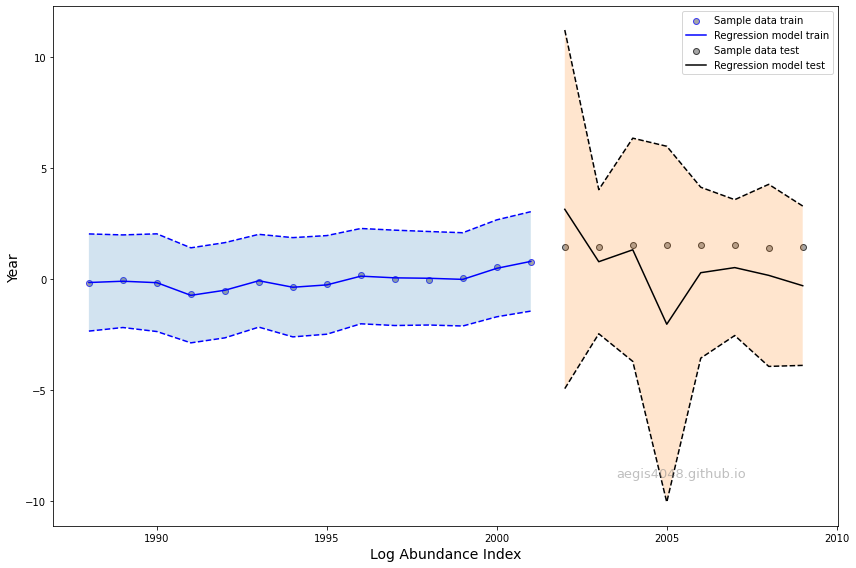

In [950]:
# Adapted from: https://stackoverflow.com/questions/67737684/plotting-confidence-interval-for-linear-regression-line-of-a-pandas-time-series
pred_train = model11.get_prediction(X_train).summary_frame()
pred_test = model11.get_prediction(X_test).summary_frame()

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(y_train.index, y_train, edgecolor='b', facecolor='grey', alpha=0.7, label='Sample data train')
ax.plot(pred_train['mean'], color='b', label='Regression model train')
ax.scatter(y_test.index, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data test')
ax.plot(pred_test['mean'], color='k', label='Regression model test')

ax.set_ylabel('Log Abundance Index', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white')

ax.plot(pred_train['mean_ci_lower'],linestyle='--',color='blue')
ax.plot(pred_train['mean_ci_upper'],linestyle='--',color='blue')
ax.plot(pred_test['mean_ci_lower'],linestyle='--',color='black')
ax.plot(pred_test['mean_ci_upper'],linestyle='--',color='black')
ax.fill_between(pred_train.index, pred_train['mean_ci_lower'], pred_train['mean_ci_upper'], alpha=0.2)
ax.fill_between(pred_test.index, pred_test['mean_ci_lower'], pred_test['mean_ci_upper'], alpha=0.2)

fig.tight_layout()


In [ ]:
# Remove test period CI
# Change wording ppt
# Send ppt for review

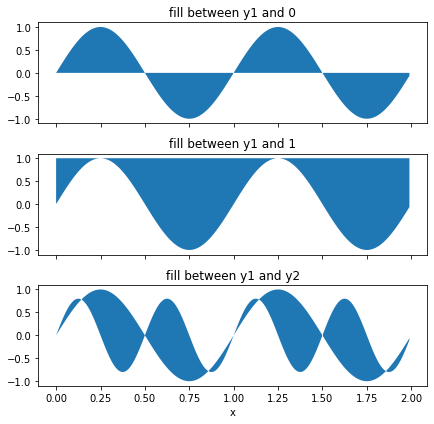

In [940]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

ax1.fill_between(x, y1)
ax1.set_title('fill between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_title('fill between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_title('fill between y1 and y2')
ax3.set_xlabel('x')
fig.tight_layout()

<AxesSubplot:xlabel='year', ylabel='striped_bass'>

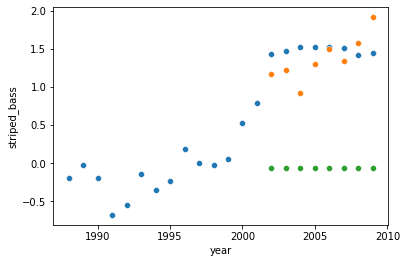

In [671]:
good_pred = metrics_by_MAE.iloc[0].predictions
dummy_pred = metrics_by_MAE.iloc[0].dummy
test_years = list(set(test_set['year']))
pred_df = pd.DataFrame({'year': test_years, 'predictions': good_pred, 'dummy': dummy_pred})

sns.scatterplot(x='year', y='striped_bass', data=log_data_df_wide)
sns.scatterplot(x='year', y='predictions', data=pred_df)
sns.scatterplot(x='year', y='dummy', data=pred_df)

<AxesSubplot:xlabel='year', ylabel='white_perch'>

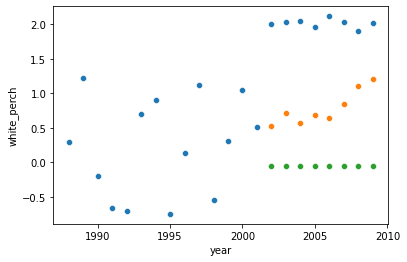

In [602]:
good_pred = metrics_by_MAE.iloc[2].predictions
dummy_pred = metrics_by_MAE.iloc[2].dummy
test_years = list(set(test_set['year']))
pred_df = pd.DataFrame({'year': test_years, 'predictions': good_pred, 'dummy': dummy_pred})

sns.scatterplot(x='year', y='white_perch', data=log_data_df_wide)
sns.scatterplot(x='year', y='predictions', data=pred_df)
sns.scatterplot(x='year', y='dummy', data=pred_df)

<AxesSubplot:xlabel='year', ylabel='white_catfish_yoy'>

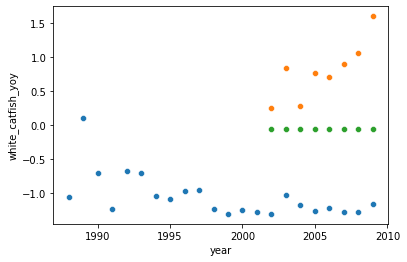

In [603]:
good_pred = metrics_by_MAE.iloc[3].predictions
dummy_pred = metrics_by_MAE.iloc[3].dummy
test_years = list(set(test_set['year']))
pred_df = pd.DataFrame({'year': test_years, 'predictions': good_pred, 'dummy': dummy_pred})

sns.scatterplot(x='year', y='white_catfish_yoy', data=log_data_df_wide)
sns.scatterplot(x='year', y='predictions', data=pred_df)
sns.scatterplot(x='year', y='dummy', data=pred_df)

In [604]:
# DataFrame to store model metrics and predictions
model_metrics = pd.DataFrame()
# Select species to model
species_to_model = 'striped_bass'

X_train = train_set.drop(species_to_model, axis=1)
y_train = train_set[species_to_model]
X_test = test_set.drop(species_to_model, axis=1)
y_test = test_set[species_to_model]

lin = LinearRegression().fit(X_train, y_train)
las = Lasso().fit(X_train, y_train)
rid = Ridge().fit(X_train, y_train)
model_list = [lin, las, rid]

for model in model_list:
    # predict on test set
    predictions = model.predict(X_test)

    # create dummy model for comparison
    index_mean = np.mean(train_set[species_to_model].values)
    dummy_guess= np.full(len(predictions), index_mean)

    # model metrics (MSE and MAE) to compare relative to dummy model
    dummy_mse = mean_squared_error(dummy_guess, predictions)
    dummy_mae = mean_absolute_error(dummy_guess, predictions)
    model_mse = mean_squared_error(y_test, predictions)
    model_mae = mean_absolute_error(y_test, predictions)
    improvement_mse = dummy_mse - model_mse
    improvement_mae = dummy_mae - model_mae

    # append metrics and predictions to DataFrame
    new_row = pd.DataFrame({'species': [species_to_model], 'model': model,\
        'Dummy MSE': [dummy_mse], 'Model MSE': [model_mse], 'MSE Improvement': [improvement_mse],\
        'Dummy MAE': [dummy_mae], 'Model MAE': [model_mae], 'MAE Improvement': [improvement_mae],\
        'predictions': [predictions], 'dummy': [dummy_guess]})
    model_metrics = pd.concat([model_metrics, new_row])

In [605]:
model_metrics = model_metrics.sort_values(by=['MAE Improvement'], ascending=False)
model_metrics[['model', 'Model MSE', 'Model MAE']]
model_metrics

,species,model,Dummy MSE,Model MSE,MSE Improvement,Dummy MAE,Model MAE,MAE Improvement,predictions,dummy
0,striped_bass,Ridge(),0.774197,0.549648,0.224549,0.847999,0.694592,0.153407,"[0.5293389502939476, 0.7181603690146119, 0.565...","[-0.058775764712701274, -0.058775764712701274,..."
0,striped_bass,LinearRegression(),0.900003,0.643084,0.256918,0.858945,0.722623,0.136322,"[0.25054903123066197, 0.8427533385847141, 0.28...","[-0.058775764712701274, -0.058775764712701274,..."
0,striped_bass,Lasso(),0.001532,2.264680,-2.263149,0.038316,1.504276,-1.465960,"[-0.032651496373457434, -0.02916826059489175, ...","[-0.058775764712701274, -0.058775764712701274,..."


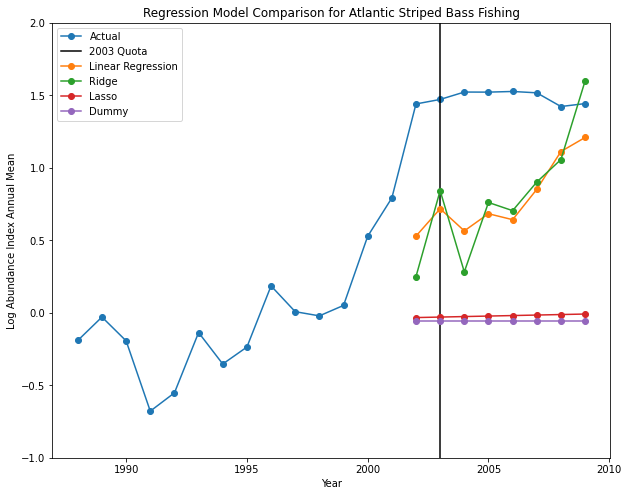

In [606]:
pred_1 = model_metrics.iloc[0].predictions
pred_2 = model_metrics.iloc[1].predictions
pred_3 = model_metrics.iloc[2].predictions
dummy_pred = model_metrics.iloc[0].dummy

test_years = list(set(test_set['year']))
pred_df = pd.DataFrame({'year': test_years, 'prediction 1': pred_1,  'prediction 2': pred_2,\
    'prediction 3': pred_3, 'dummy': dummy_pred})

# Adapted from: https://stackoverflow.com/questions/42767489/add-legend-to-seaborn-point-plot
f, ax = plt.subplots(1, 1)

ax.plot('year', species_to_model, data=log_data_df_wide, linestyle='-', marker='o')
plt.axvline(x = 2003, color = 'k', label = 'axvline - full height')
ax.plot('year', 'prediction 1', data=pred_df, linestyle='-', marker='o')

ax.plot('year', 'prediction 2', data=pred_df, linestyle='-', marker='o')
ax.plot('year', 'prediction 3', data=pred_df, linestyle='-', marker='o')
ax.plot('year', 'dummy', data=pred_df, linestyle='-', marker='o')

ax.legend(['Actual', '2003 Quota', 'Linear Regression', 'Ridge', 'Lasso', 'Dummy'])
ax.set_xlabel('Year')
ax.set_ylabel('Log Abundance Index Annual Mean')
ax.set_title('Regression Model Comparison for Atlantic Striped Bass Fishing')
plt.ylim(-1,2)
plt.gcf().set_size_inches(10, 8)
plt.show()

In [ ]:
# reduce num of features, then try for CI again.

# bullet points instead of text.
# By F, send email update. Weekend polish.
# Cap 3 maybe Tableau dashboarding. 
# Generally applicable. Customer acquisition/churn.

In [607]:
#Adapted from: https://towardsdatascience.com/generating-confidence-intervals-for-regression-models-2dd60026fbce
def generate_results_dataset(preds, ci):
    df = pd.DataFrame()
    df['prediction'] = preds
    if ci >= 0:
        df['upper'] = preds + ci
        df['lower'] = preds - ci
    else:
        df['upper'] = preds - ci
        df['lower'] = preds + ci
        
    return df

alpha = 0.05
residuals = y_train - lin.predict(X_train)
ci = np.quantile(residuals, 1 - alpha)
preds = lin.predict(X_test)
df = generate_results_dataset(preds, ci)
print(df)
print(residuals)

   prediction     upper     lower
0    0.250549  0.250549  0.250549
1    0.842753  0.842753  0.842753
2    0.282597  0.282597  0.282597
3    0.761374  0.761374  0.761374
4    0.704956  0.704956  0.704956
5    0.902242  0.902242  0.902242
6    1.057498  1.057498  1.057498
7    1.599385  1.599385  1.599385
0    -3.400058e-14
1    -6.629766e-14
2    -9.958701e-14
3     1.154632e-14
4    -4.496403e-14
5    -4.746203e-15
6    -1.026956e-14
7     2.275957e-14
8    -1.545986e-14
9     2.553513e-15
10    8.097689e-15
11    2.334244e-14
12   -7.105427e-15
13    2.853273e-14
Name: striped_bass, dtype: float64


In [178]:
model_metrics = pd.DataFrame()
# Select species to model
species_to_model = 'striped_bass'

X_train = train_set.drop(species_to_model, axis=1)
y_train = train_set[species_to_model]
X_test = test_set.drop(species_to_model, axis=1)
y_test = test_set[species_to_model]
train_set
test_set
log_data_df_wide['year+1'] = log_data_df_wide['year'] + 1
log_data_df_wide['year+2'] = log_data_df_wide['year'] + 2
log_data_df_wide

species,year,blue_catfish_yoy,channel_catfish_yoy,y-o-y_winter_flounder,white_perch_yoy,silver_perch_yoy,striped_bass_yoy,bay_anchovy_yoy,black_sea_bass_yoy,spot_yoy,...,spot,american_sand_lance,striped_bass,winter_flounder,weakfish,black_sea_bass,summer_flounder,white_perch,year+1,year+2
0,1988,-1.300992,-1.278023,1.017637,0.386821,-0.787846,-0.476169,0.903870,-0.657751,1.360873,...,1.670623,1.495286,-0.190350,1.004755,1.171841,-0.569272,1.189221,0.287848,1989,1990
1,1989,-0.908218,-0.249231,0.463560,0.753052,-0.839020,-0.330010,1.287691,-0.136821,1.115575,...,0.838995,1.436600,-0.028986,0.863350,1.178284,-0.587447,-1.111833,1.222979,1990,1991
2,1990,-1.151742,-1.255644,0.427125,0.038478,-0.739941,-0.552070,0.438494,-0.525822,1.237295,...,0.918134,1.455874,-0.193312,0.670968,0.663733,-0.674775,0.681876,-0.197223,1991,1992
3,1991,-0.937721,-1.266761,0.555125,0.175098,-0.968374,-0.538821,0.989405,-0.460396,0.869571,...,0.929021,1.511349,-0.678066,0.701438,1.331994,-0.984340,-0.685475,-0.658357,1992,1993
4,1992,-0.960599,-1.300992,0.979914,-0.311141,-0.673462,-0.484196,1.201092,-1.076966,-0.249231,...,-0.539921,0.207734,-0.551922,0.583368,0.142585,-0.452979,0.386135,-0.702229,1993,1994
5,1993,-1.113513,-1.255644,0.635417,0.925855,-0.893874,-0.100688,1.226373,-0.556543,0.621652,...,-0.611906,-1.062100,-0.135812,0.662654,1.288641,-0.328107,-1.121485,0.699746,1994,1995
6,1994,-1.122907,-1.244667,1.096530,0.797823,-1.050583,-0.448806,0.809788,-0.552070,0.593427,...,0.779079,-0.920257,-0.352971,0.614162,1.351955,-0.794431,-0.637506,0.907300,1995,1996
7,1995,-0.769519,-1.076966,0.922472,-0.087696,-0.806633,-0.775578,0.906386,-0.859134,-0.359402,...,-0.935871,-0.763508,-0.236006,1.024740,1.286069,-0.656651,0.203977,-0.749400,1996,1997
8,1996,-0.617467,-1.161579,1.110332,1.021175,-0.800318,-0.787846,0.828591,-0.960599,0.303774,...,0.960518,-0.001541,0.185845,0.877314,1.344365,-0.360661,0.186742,0.131649,1997,1998
9,1997,-0.127576,-1.244667,0.906727,0.599231,-0.728433,-0.825899,0.919784,-0.886800,0.698874,...,-0.779069,1.301370,0.007965,0.886470,1.369568,0.775092,0.511233,1.119193,1998,1999
